## Import Library

In [2]:
import numpy as np
import pandas as pd
import os
import re # Import Regex
# Import NLTK
import nltk
from nltk.stem import PorterStemmer
# End Import NLTK
from collections import Counter # Import Counter
import math # Import Math

In [3]:
# Ambil list Stopwords dari file txt
f = open("stopword/stopwords-en.txt", "r")
stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    stopword_list.append(line_list[0])
f.close()

# print(stopword_list)
len(stopword_list)

1298

## Preparation

### Defining Function

In [4]:
documents_list = []
document_path = "docs"

# os.listdir returns a list containing all files under the given path
list_doc = os.listdir(document_path)


for doc_name in list_doc:
  if doc_name.endswith('.txt'):
    try:
      filepath = os.path.join(document_path, doc_name)
      if os.path.isfile(filepath):
        f = open(filepath, "r")
        documents_list.append(
          {'title':doc_name,
          'teks':f.read()}
          )
        f.close()

    except Exception as e:
      print(e)

document_count = len(documents_list)

documents_list

[{'title': 'Doc5.txt',
  'teks': 'Training head cost factor on evidence evidence have'},
 {'title': 'Doc4.txt', 'teks': 'Arrive fire pattern each'},
 {'title': 'Doc1.txt',
  'teks': 'My favorite favorite food documents is chocolate'},
 {'title': 'Doc3.txt', 'teks': 'My favorite food is chicken nugget'},
 {'title': 'Doc2.txt', 'teks': 'My favorite food is chocolate'}]

## VSM Process

### Document Process

In [5]:
def tokenize(text):
  # Convert text to lowercase (case folding)
  text = text.lower()

  # Remove Punctuation
  text = re.sub(r'[^\w\s]', '', text)

  # Break Word
  words = re.findall(r'\b\w+\b', text)

  return words

In [6]:
# Tokenize masing-masing document
for doc in documents_list:
    doc['content'] = tokenize(doc['teks'])

    
for doc in documents_list:
    print(doc)

{'title': 'Doc5.txt', 'teks': 'Training head cost factor on evidence evidence have', 'content': ['training', 'head', 'cost', 'factor', 'on', 'evidence', 'evidence', 'have']}
{'title': 'Doc4.txt', 'teks': 'Arrive fire pattern each', 'content': ['arrive', 'fire', 'pattern', 'each']}
{'title': 'Doc1.txt', 'teks': 'My favorite favorite food documents is chocolate', 'content': ['my', 'favorite', 'favorite', 'food', 'documents', 'is', 'chocolate']}
{'title': 'Doc3.txt', 'teks': 'My favorite food is chicken nugget', 'content': ['my', 'favorite', 'food', 'is', 'chicken', 'nugget']}
{'title': 'Doc2.txt', 'teks': 'My favorite food is chocolate', 'content': ['my', 'favorite', 'food', 'is', 'chocolate']}


In [7]:
def remove_stopwords(tokens):
    # Remove stopwords from the list of tokens
    filtered_tokens = [token for token in tokens if token not in stopword_list]

    return filtered_tokens

In [8]:
for doc in documents_list:
  doc['content'] = remove_stopwords(doc['content'])

for doc in documents_list:
    print(doc)

{'title': 'Doc5.txt', 'teks': 'Training head cost factor on evidence evidence have', 'content': ['training', 'head', 'cost', 'factor', 'evidence', 'evidence']}
{'title': 'Doc4.txt', 'teks': 'Arrive fire pattern each', 'content': ['arrive', 'pattern']}
{'title': 'Doc1.txt', 'teks': 'My favorite favorite food documents is chocolate', 'content': ['favorite', 'favorite', 'food', 'documents', 'chocolate']}
{'title': 'Doc3.txt', 'teks': 'My favorite food is chicken nugget', 'content': ['favorite', 'food', 'chicken', 'nugget']}
{'title': 'Doc2.txt', 'teks': 'My favorite food is chocolate', 'content': ['favorite', 'food', 'chocolate']}


In [9]:
# Initialize Porter Stemmer
stemmer = PorterStemmer()

def stem_tokens(tokens):
    # Perform stemming on each token
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    return stemmed_tokens

In [10]:
# Lakukan Stemming pada document
for doc in documents_list:
  doc['content'] = stem_tokens(doc['content'])

for doc in documents_list:
    print(doc)

{'title': 'Doc5.txt', 'teks': 'Training head cost factor on evidence evidence have', 'content': ['train', 'head', 'cost', 'factor', 'evid', 'evid']}
{'title': 'Doc4.txt', 'teks': 'Arrive fire pattern each', 'content': ['arriv', 'pattern']}
{'title': 'Doc1.txt', 'teks': 'My favorite favorite food documents is chocolate', 'content': ['favorit', 'favorit', 'food', 'document', 'chocol']}
{'title': 'Doc3.txt', 'teks': 'My favorite food is chicken nugget', 'content': ['favorit', 'food', 'chicken', 'nugget']}
{'title': 'Doc2.txt', 'teks': 'My favorite food is chocolate', 'content': ['favorit', 'food', 'chocol']}


### Querry Process

In [11]:
query = "find documents about chicken nugget"
query

'find documents about chicken nugget'

In [12]:
query_tokens = tokenize(query)
print(query_tokens)

['find', 'documents', 'about', 'chicken', 'nugget']


In [13]:
query_tokens = remove_stopwords(query_tokens)
query_tokens

['documents', 'chicken', 'nugget']

In [14]:
query_tokens = stem_tokens(query_tokens)
query_tokens

['document', 'chicken', 'nugget']

In [15]:
def find_count(query_tokens):
    query_count = {token: query_tokens.count(token) for token in query_tokens}
    
    return query_count

query_count = find_count(query_tokens)
query_count

{'document': 1, 'chicken': 1, 'nugget': 1}

In [16]:
# Buat list dari kata unik
word_list = set(word for doc in documents_list for word in doc['content'])
word_list = list(word_list)

# Definisikan index Q dan titles
custom_index_name = 'Q'
doc_titles = [doc['title'] for doc in documents_list]

# Inisiasi Dataframe dari Term Frequency
tf_count = pd.DataFrame(columns=[custom_index_name] + sorted(doc_titles), index=word_list)

# Hitung frequency kata dari masing-masing dokumen
for doc in documents_list:
    word_count = {word: doc['content'].count(word) for word in word_list}
    tf_count[doc['title']] = tf_count.index.map(word_count.get)

# Map data query dan isi data NaN ke 0
tf_count['Q'] = tf_count.index.map(query_count.get)   
tf_count = tf_count.fillna(0).astype(int)

tf_count

,Q,Doc1.txt,Doc2.txt,Doc3.txt,Doc4.txt,Doc5.txt
food,0,1,1,1,0,0
chicken,1,0,0,1,0,0
arriv,0,0,0,0,1,0
nugget,1,0,0,1,0,0
head,0,0,0,0,0,1
train,0,0,0,0,0,1
document,1,1,0,0,0,0
cost,0,0,0,0,0,1
factor,0,0,0,0,0,1
pattern,0,0,0,0,1,0


In [17]:
# Copy dataframe tf_count dan buat dataframe baru bernama df_count
df_count = tf_count.copy()
# Inisiasi column_df dengan 0
column_df = 0
# Hitung nilai column_df
if 'df' not in df_count.columns:
    column_df = df_count.drop(columns='Q').astype(bool).sum(axis=1)
    df_count['df'] = column_df

df_count

,Q,Doc1.txt,Doc2.txt,Doc3.txt,Doc4.txt,Doc5.txt,df
food,0,1,1,1,0,0,3
chicken,1,0,0,1,0,0,1
arriv,0,0,0,0,1,0,1
nugget,1,0,0,1,0,0,1
head,0,0,0,0,0,1,1
train,0,0,0,0,0,1,1
document,1,1,0,0,0,0,1
cost,0,0,0,0,0,1,1
factor,0,0,0,0,0,1,1
pattern,0,0,0,0,1,0,1


### Finding IDF

In [18]:
# Buat copy baru dari dataframe df_count
idf_df = df_count.copy()

# Hitung nilai idf dan simpan kedalam variabel idf_values
idf_values = (np.log10(document_count/column_df)) 

# Buat sebuah pandas series dari idf_values
idf_values = pd.Series(idf_values)

# Tambahkan kolom idf dengan nilai dari idf_values
idf_df['IDF'] = idf_values.loc[word_list].values

idf_df

,Q,Doc1.txt,Doc2.txt,Doc3.txt,Doc4.txt,Doc5.txt,df,IDF
food,0,1,1,1,0,0,3,0.221849
chicken,1,0,0,1,0,0,1,0.698970
arriv,0,0,0,0,1,0,1,0.698970
nugget,1,0,0,1,0,0,1,0.698970
head,0,0,0,0,0,1,1,0.698970
train,0,0,0,0,0,1,1,0.698970
document,1,1,0,0,0,0,1,0.698970
cost,0,0,0,0,0,1,1,0.698970
factor,0,0,0,0,0,1,1,0.698970
pattern,0,0,0,0,1,0,1,0.698970


### Finding TF-IDF

In [19]:
# Buat copy baru dari dataframe idf_df
df_w = idf_df.copy()

# Ambil nilai idf dan simpan ke variabel idf_row
idf_row = df_w['IDF']

# Ambil data terkecuali 2 kolom akhir dari df, yaitu kolom df dan idf
tf_df = df_w.iloc[:, :-2]

# Hitung nilai tf-idf dengan mengkalikan nilai tf dengan idf
tfidf_df = tf_df.mul(idf_row, axis=0)

# Tambahkan awalan W_ pada kolom Q
new_columns = ['W_' + col if 'Q' in col else col for col in tfidf_df.columns]
tfidf_df.columns = new_columns

tfidf_df

,W_Q,Doc1.txt,Doc2.txt,Doc3.txt,Doc4.txt,Doc5.txt
food,0.00000,0.221849,0.221849,0.221849,0.00000,0.00000
chicken,0.69897,0.000000,0.000000,0.698970,0.00000,0.00000
arriv,0.00000,0.000000,0.000000,0.000000,0.69897,0.00000
nugget,0.69897,0.000000,0.000000,0.698970,0.00000,0.00000
head,0.00000,0.000000,0.000000,0.000000,0.00000,0.69897
train,0.00000,0.000000,0.000000,0.000000,0.00000,0.69897
document,0.69897,0.698970,0.000000,0.000000,0.00000,0.00000
cost,0.00000,0.000000,0.000000,0.000000,0.00000,0.69897
factor,0.00000,0.000000,0.000000,0.000000,0.00000,0.69897
pattern,0.00000,0.000000,0.000000,0.000000,0.69897,0.00000


In [20]:
result = pd.concat([idf_df, tfidf_df], axis=1)
result

,Q,Doc1.txt,Doc2.txt,Doc3.txt,Doc4.txt,Doc5.txt,df,IDF,W_Q,Doc1.txt,Doc2.txt,Doc3.txt,Doc4.txt,Doc5.txt
food,0,1,1,1,0,0,3,0.221849,0.00000,0.221849,0.221849,0.221849,0.00000,0.00000
chicken,1,0,0,1,0,0,1,0.698970,0.69897,0.000000,0.000000,0.698970,0.00000,0.00000
arriv,0,0,0,0,1,0,1,0.698970,0.00000,0.000000,0.000000,0.000000,0.69897,0.00000
nugget,1,0,0,1,0,0,1,0.698970,0.69897,0.000000,0.000000,0.698970,0.00000,0.00000
head,0,0,0,0,0,1,1,0.698970,0.00000,0.000000,0.000000,0.000000,0.00000,0.69897
train,0,0,0,0,0,1,1,0.698970,0.00000,0.000000,0.000000,0.000000,0.00000,0.69897
document,1,1,0,0,0,0,1,0.698970,0.69897,0.698970,0.000000,0.000000,0.00000,0.00000
cost,0,0,0,0,0,1,1,0.698970,0.00000,0.000000,0.000000,0.000000,0.00000,0.69897
factor,0,0,0,0,0,1,1,0.698970,0.00000,0.000000,0.000000,0.000000,0.00000,0.69897
pattern,0,0,0,0,1,0,1,0.698970,0.00000,0.000000,0.000000,0.000000,0.69897,0.00000


In [24]:
# Hitung nilai kuadrat
squared_df = tfidf_df.map(lambda x: x ** 2)
squared_df

,W_Q,Doc1.txt,Doc2.txt,Doc3.txt,Doc4.txt,Doc5.txt
food,0.000000,0.049217,0.049217,0.049217,0.000000,0.000000
chicken,0.488559,0.000000,0.000000,0.488559,0.000000,0.000000
arriv,0.000000,0.000000,0.000000,0.000000,0.488559,0.000000
nugget,0.488559,0.000000,0.000000,0.488559,0.000000,0.000000
head,0.000000,0.000000,0.000000,0.000000,0.000000,0.488559
train,0.000000,0.000000,0.000000,0.000000,0.000000,0.488559
document,0.488559,0.488559,0.000000,0.000000,0.000000,0.000000
cost,0.000000,0.000000,0.000000,0.000000,0.000000,0.488559
factor,0.000000,0.000000,0.000000,0.000000,0.000000,0.488559
pattern,0.000000,0.000000,0.000000,0.000000,0.488559,0.000000


In [30]:
# Jumlahkan masing-masing nilai kuadrat setiap kolom
sum_squared = squared_df.sum()
# Akarkan hasil penjumlahan
sum_squared = np.sqrt(sum_squared)
# Transpose Matriks, tukar kolom menjadi row, row menjadi kolom
sum_squared = pd.DataFrame(sum_squared).T
sum_squared.index = ['SQRT_Q']

sum_squared

,W_Q,Doc1.txt,Doc2.txt,Doc3.txt,Doc4.txt,Doc5.txt
SQRT_Q,1.210652,0.944987,0.506744,1.037088,0.988493,1.976986


In [33]:
# Copy dataframe yang telah di kuadratkan kedalam dataframe baru Query_Document_df
Q_D_df = squared_df.copy()
Q_D_df_result = pd.concat([squared_df, sum_squared])
Q_D_df_result

,W_Q,Doc1.txt,Doc2.txt,Doc3.txt,Doc4.txt,Doc5.txt
food,0.000000,0.049217,0.049217,0.049217,0.000000,0.000000
chicken,0.488559,0.000000,0.000000,0.488559,0.000000,0.000000
arriv,0.000000,0.000000,0.000000,0.000000,0.488559,0.000000
nugget,0.488559,0.000000,0.000000,0.488559,0.000000,0.000000
head,0.000000,0.000000,0.000000,0.000000,0.000000,0.488559
train,0.000000,0.000000,0.000000,0.000000,0.000000,0.488559
document,0.488559,0.488559,0.000000,0.000000,0.000000,0.000000
cost,0.000000,0.000000,0.000000,0.000000,0.000000,0.488559
factor,0.000000,0.000000,0.000000,0.000000,0.000000,0.488559
pattern,0.000000,0.000000,0.000000,0.000000,0.488559,0.000000


In [34]:
# Ambil nilai dari W_Q
W_Q_df = Q_D_df['W_Q']

# Hapus Kolom pertama, yaitu W_Q dari kolom awal
D_Q_df = Q_D_df.iloc[:, 1:]
D_Q_df

,Doc1.txt,Doc2.txt,Doc3.txt,Doc4.txt,Doc5.txt
food,0.049217,0.049217,0.049217,0.000000,0.000000
chicken,0.000000,0.000000,0.488559,0.000000,0.000000
arriv,0.000000,0.000000,0.000000,0.488559,0.000000
nugget,0.000000,0.000000,0.488559,0.000000,0.000000
head,0.000000,0.000000,0.000000,0.000000,0.488559
train,0.000000,0.000000,0.000000,0.000000,0.488559
document,0.488559,0.000000,0.000000,0.000000,0.000000
cost,0.000000,0.000000,0.000000,0.000000,0.488559
factor,0.000000,0.000000,0.000000,0.000000,0.488559
pattern,0.000000,0.000000,0.000000,0.488559,0.000000


In [35]:
# Lakukan perhitungan dot product dari W_Q dengan masing-masing row di D_Q
Dot_p_df = D_Q_df.mul(W_Q_df, axis=0)

# Rename nama kolom dengan menambahkan Q*
new_columns = ['Q*' + col[:] for col in Dot_p_df.columns]
Dot_p_df.columns = new_columns

Dot_p_df

,Q*Doc1.txt,Q*Doc2.txt,Q*Doc3.txt,Q*Doc4.txt,Q*Doc5.txt
food,0.00000,0.0,0.00000,0.0,0.0
chicken,0.00000,0.0,0.23869,0.0,0.0
arriv,0.00000,0.0,0.00000,0.0,0.0
nugget,0.00000,0.0,0.23869,0.0,0.0
head,0.00000,0.0,0.00000,0.0,0.0
train,0.00000,0.0,0.00000,0.0,0.0
document,0.23869,0.0,0.00000,0.0,0.0
cost,0.00000,0.0,0.00000,0.0,0.0
factor,0.00000,0.0,0.00000,0.0,0.0
pattern,0.00000,0.0,0.00000,0.0,0.0


In [37]:
# Jumlahkan hasil dari dot product
Q_D_summed = Dot_p_df.sum()
Q_D_summed = pd.DataFrame(Q_D_summed).T
Q_D_summed.index = ['SUM_Q*D']

Q_D_summed

,Q*Doc1.txt,Q*Doc2.txt,Q*Doc3.txt,Q*Doc4.txt,Q*Doc5.txt
SUM_Q*D,0.23869,0.0,0.47738,0.0,0.0


### Finishing

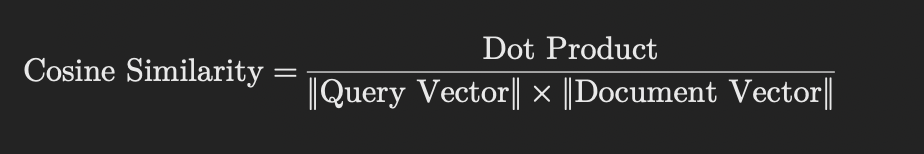

In [40]:
# Query Vector (Q dan Document Vector)
sum_squared

,W_Q,Doc1.txt,Doc2.txt,Doc3.txt,Doc4.txt,Doc5.txt
SQRT_Q,1.210652,0.944987,0.506744,1.037088,0.988493,1.976986


In [41]:
# Dot Product
Q_D_summed

,Q*Doc1.txt,Q*Doc2.txt,Q*Doc3.txt,Q*Doc4.txt,Q*Doc5.txt
SUM_Q*D,0.23869,0.0,0.47738,0.0,0.0


### Cosine Similarity

In [43]:
# Ambil Nilai Query Vector
Q = sum_squared['W_Q']
Q

SQRT_Q    1.210652
Name: W_Q, dtype: float64

In [46]:
# Ambil Nilai Document Vector
D_squared = sum_squared.iloc[:, 1:]
D_squared

,Doc1.txt,Doc2.txt,Doc3.txt,Doc4.txt,Doc5.txt
SQRT_Q,0.944987,0.506744,1.037088,0.988493,1.976986


In [48]:
# Hitung nilai cosine similarity
Cosine_sim = Q_D_summed.values / (D_squared.values * Q.values)
Cosine_sim

array([[0.20863605, 0.        , 0.38021505, 0.        , 0.        ]])

In [49]:
# Buat dataframe untuk menampung nilai dari cosine similarity
result_df = pd.DataFrame(Cosine_sim, columns=D_squared.columns, index=['Cosine'])
result_df

,Doc1.txt,Doc2.txt,Doc3.txt,Doc4.txt,Doc5.txt
Cosine,0.208636,0.0,0.380215,0.0,0.0


In [50]:
# Transpose Matrix
result_df = result_df.T
result_df

,Cosine
Doc1.txt,0.208636
Doc2.txt,0.000000
Doc3.txt,0.380215
Doc4.txt,0.000000
Doc5.txt,0.000000


In [51]:
# Ranked dataframe berdasarkan kolom Cosine dengan urutan descending
ranked_df = result_df.sort_values(by='Cosine', ascending=False)
ranked_df

,Cosine
Doc3.txt,0.380215
Doc1.txt,0.208636
Doc2.txt,0.000000
Doc4.txt,0.000000
Doc5.txt,0.000000


In [53]:
# Find the most relevant document
most_relevant_document_title = ranked_df.index[0]

# Print the most relevant document title and its original text
for doc in documents_list:
    if doc['title'] == most_relevant_document_title:
        print(f"Dokumen yang paling relevan terhadap query merupakan dokumen: {doc['title']}")
        print(f"Teks: {doc['teks']}")
        break

Dokumen yang paling relevan terhadap query merupakan dokumen: Doc3.txt
Teks: My favorite food is chicken nugget
